<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week6/day3/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Airplane.csv', encoding='latin1')

df.dropna(inplace=True)

print("Cleaned Dataset:")
print(df.head())


Cleaned Dataset:
          Date   Time               Location  \
217  1/19/1930  18:23  Oceanside, California   
247  3/31/1931  10:45         Bazaar, Kansas   
348  8/31/1934  22:45     Amazonia, Missouri   
370   5/6/1935   3:30      Atlanta, Missouri   
384  8/14/1935  23:45     Near Gilmer, Texas   

                              Operator Flight #  \
217                    Maddux Airlines        7   
247  Trans Continental and Western Air      599   
348                Rapid Air Transport        6   
370  Trans Continental and Western Air        6   
384                    Delta Air Lines        4   

                                                 Route                AC Type  \
217                Aqua Caliente, Mexico - Los Angeles  Ford 5-AT-C Tri Motor   
247               Kansas City - Wichita -  Los Angeles   Fokker F10A Trimotor   
348                 Kansas City - Saint Joseph - Omaha      Stinson  SM-6000B   
370  Los Angeles - Albuquerque - Kanasas City -  Wa...       Do

In [18]:
df

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
217,1/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,14.0,2.0,16.0,14.0,2.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
247,3/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,6.0,2.0,8.0,6.0,2.0,0.0,"Shortly after taking off from Kansas City, one..."
348,8/31/1934,22:45,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5.0,4.0,1.0,5.0,4.0,1.0,0.0,The plane crashed about 11 miles from St. Jose...
370,5/6/1935,3:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,12.0,2.0,5.0,3.0,2.0,0.0,The plane crashed while en route from Albuquer...
384,8/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,3.0,1.0,4.0,3.0,1.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,3/21/2022,6:22,"Wuzhou, Guangxi, China",China Eastern Airlines,MU 5735,Kunming - Guangzhou,Boeing 737-89P WL,B-1791,41474/5453,132.0,123.0,9.0,132.0,123.0,9.0,0.0,"Flying at 29,098 feet, the jetliner started de..."
4990,7/16/2022,22:47,"Eleftheroupolis, Greece",Meridian,MEM3032,Nis- Amman,Antonov An-12,UR-CIC,1347701,8.0,0.0,8.0,8.0,0.0,8.0,0.0,The cargo plane carrying eight crew members an...
4991,11/6/2022,8:53,"Bukoba, Tanzania",Precision Air,PW494,Dar es-Salaam -Bukoba,ATR 42-500,5H-PWF,819,43.0,39.0,4.0,19.0,17.0,2.0,0.0,"While on final approach to Bukoba Airport, the..."
4992,11/18/2022,15:11,"Lima, Peru",LATAM,LA2213,Lima - Juliaca,Airbus 320-271N,CC-BHB,7864,108.0,102.0,6.0,0.0,0.0,0.0,0.0,The Airbus A320 collided with a fire truck whi...


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

num_crashes = df['Registration'].nunique()

num_survivors = df['Fatalities Passangers'].sum()

num_fatalities = num_crashes - num_survivors

survival_rate = num_survivors / num_crashes

print(f"Number of Crashes: {num_crashes}")
print(f"Number of Fatalities: {num_fatalities}")
print(f"Number of Survivors: {num_survivors}")
print(f"Survival Rate: {survival_rate:.2%}")



Number of Crashes: 1244
Number of Fatalities: -48798.0
Number of Survivors: 50042.0
Survival Rate: 4022.67%


In [35]:
from scipy.stats import describe, ttest_ind

fatalities_stats = describe(df['Fatalities'])
survival_rate_stats = describe(df['Fatalities Passangers'])


t_statistic, p_value = ttest_ind(df[df['Date'] == '2000s']['Fatalities'],
                                  df[df['Date'] == '2010s']['Fatalities'])

print("Fatalities Statistics:")
print(fatalities_stats)
print("\nSurvival Rate Statistics:")
print(survival_rate_stats)
print("\nHypothesis Test Results:")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")


Fatalities Statistics:
DescribeResult(nobs=1245, minmax=(0.0, 583.0), mean=44.78072289156626, variance=3190.1632936892265, skewness=2.8558022117607558, kurtosis=14.070901557283584)

Survival Rate Statistics:
DescribeResult(nobs=1245, minmax=(0.0, 560.0), mean=40.19437751004016, variance=2892.240322059944, skewness=2.9308448808042136, kurtosis=14.886616365746097)

Hypothesis Test Results:
T-Statistic: nan
P-Value: nan


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


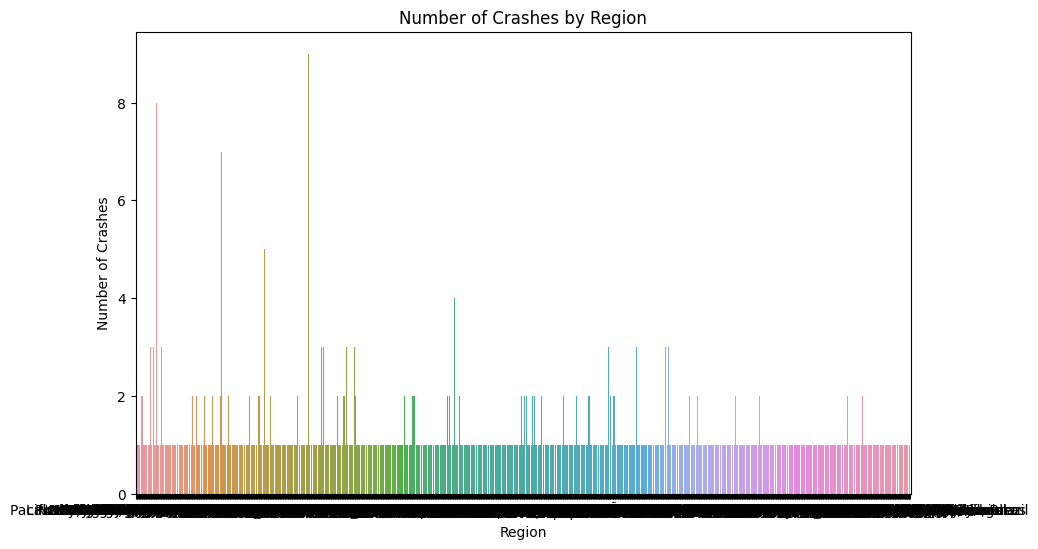

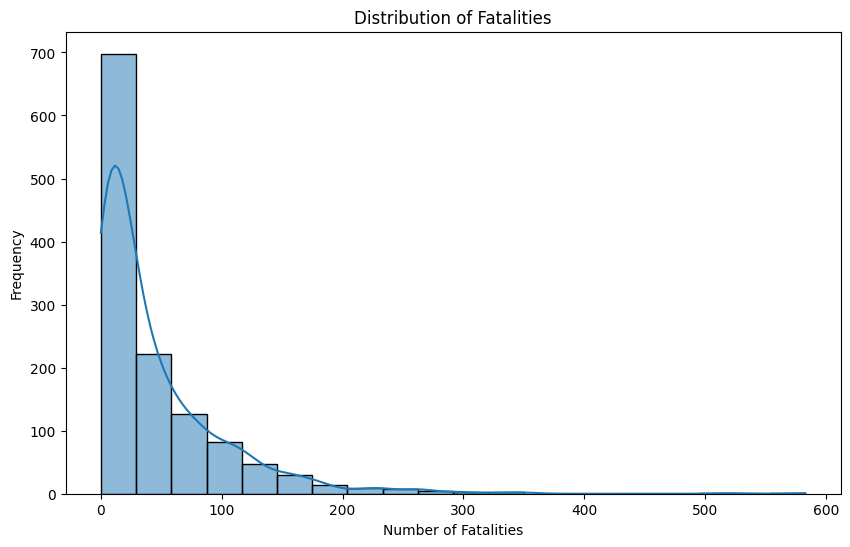

In [37]:


plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df)
plt.title('Number of Crashes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Crashes')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], bins=20, kde=True)
plt.title('Distribution of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()
